In [5]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets.mnist import load_data 
import numpy as np
from tensorflow.keras.utils import to_categorical

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
# Preprocess
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Normalize train data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Investigate updated x
print('x_train.shape: {}, x_test.shape: {})'.format(x_train.shape, x_test.shape))
print('x_train.dtype: {}, x_test.dtype: {}'.format(x_train.dtype, x_test.dtype))
print('x_train.Range: {} - {}, x_test.Range: {} - {}'.format(x_train.max(), x_train.min(), x_test.max(), x_test.min()))


# turn y into one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('y_train.shape: {}, y_test.shape: {})'.format(y_train.shape, y_test.shape))
print('y_train.dtype: {}, testX.dtype: {}'.format(y_train.dtype, y_test.dtype))

print(y_train[:5])

x_train.shape: (60000, 28, 28, 1), x_test.shape: (10000, 28, 28, 1))
x_train.dtype: float32, x_test.dtype: float32
x_train.Range: 1.0 - 0.0, x_test.Range: 1.0 - 0.0
y_train.shape: (60000, 10), y_test.shape: (10000, 10))
y_train.dtype: float64, testX.dtype: float64
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model 

In [13]:
# FCNN

inputs = Input((28, 28, 1), name='input layer')
x = Flatten()(inputs)
x = Dense(2, activation='relu')(x)
x = Dense(4, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='relu')(x)
outputs = Dense(10, activation = 'softmax')(x)

model = Model(inputs, outputs)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,708 (6.67 KB)

 Trainable params: 1,708 (6.67 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=9, validation_split=0.1)

Epoch 1/9
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1873 - loss: 2.0763 - val_accuracy: 0.3498 - val_loss: 1.6783
Epoch 2/9
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3573 - loss: 1.6348 - val_accuracy: 0.4407 - val_loss: 1.4402
Epoch 3/9
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4508 - loss: 1.4369 - val_accuracy: 0.5183 - val_loss: 1.2716
Epoch 4/9
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5220 - loss: 1.3041 - val_accuracy: 0.5655 - val_loss: 1.2041
Epoch 5/9
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5667 - loss: 1.2333 - val_accuracy: 0.5883 - val_loss: 1.1798
Epoch 6/9
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5973 - loss: 1.1899 - val_accuracy: 0.6305 - val_loss: 1.1101
Epoch 7/9
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6151 - loss: 1.1598 - val_accuracy: 0.6373 - val_loss: 1.0897
Epoch 8/9
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6182 - loss: 1.1431 - val_accuracy: 0.6410 - v

In [15]:
# evaluate the model performance

model.evaluate(x_test, y_test)
predicted_y = model.predict(x_test)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
    print(np.argmax(y_test[i]), '\t\t', np.argmax(predicted_y[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6283 - loss: 1.1434
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 1
4 		 4
1 		 1
4 		 4
9 		 4
5 		 0
9 		 9


In [16]:
# Data generator

datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

datagen.fit(x_train)

In [23]:

aug_images = []
aug_labels = []

for i in range(10000):
    index = np.random.randint(0, len(x_train))

    image = x_train[index]
    label = y_train[index]

    image = image.reshape(1, 28, 28, 1)

    aug_image = next(datagen.flow(image, batch_size=1))[0]

    aug_images.append(aug_image)
    aug_labels.append(label)

aug_images = np.array(aug_images)
aug_labels = np.array(aug_labels)

In [29]:
x_train_aug = np.concatenate((x_train, aug_images), axis=0)
y_train_aug = np.concatenate((y_train, aug_labels), axis=0)

In [40]:
x_train_aug.shape

(70000, 28, 28, 1)

In [25]:
# FCNN

inputs = Input((28, 28, 1), name='input layer')
x = Flatten()(inputs)
x = Dense(2, activation='relu')(x)
x = Dense(4, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='relu')(x)
outputs = Dense(10, activation = 'softmax')(x)

model_2 = Model(inputs, outputs)
model_2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,708 (6.67 KB)

 Trainable params: 1,708 (6.67 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_2.fit(x_train, y_train, batch_size=64, epochs=8, validation_split=0.1)

Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2027 - loss: 2.0906 - val_accuracy: 0.2542 - val_loss: 1.7395
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2801 - loss: 1.7055 - val_accuracy: 0.3632 - val_loss: 1.5458
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3535 - loss: 1.5550 - val_accuracy: 0.3985 - val_loss: 1.4416
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3965 - loss: 1.4643 - val_accuracy: 0.4783 - val_loss: 1.3178
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4954 - loss: 1.3348 - val_accuracy: 0.5387 - val_loss: 1.2109
Epoch 6/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5420 - loss: 1.2316 - val_accuracy: 0.5858 - val_loss: 1.1294
Epoch 7/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5713 - loss: 1.1818 - val_accuracy: 0.6093 - val_loss: 1.0750
Epoch 8/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6002 - loss: 1.1279 - val_accuracy: 0.6362 - v

In [28]:
# evaluate the model performance

model_2.evaluate(x_test, y_test)
predicted_y = model_2.predict(x_test)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
    print(np.argmax(y_test[i]), '\t\t', np.argmax(predicted_y[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6064 - loss: 1.1549
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 4
1 		 1
4 		 4
9 		 9
5 		 6
9 		 7


In [30]:
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_2.fit(x_train_aug, y_train_aug, batch_size=64, epochs=8, validation_split=0.1)

Epoch 1/8
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6010 - loss: 1.2333 - val_accuracy: 0.3294 - val_loss: 3.4993
Epoch 2/8
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6382 - loss: 1.1411 - val_accuracy: 0.3469 - val_loss: 3.2485
Epoch 3/8
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6611 - loss: 1.0896 - val_accuracy: 0.3647 - val_loss: 3.1460
Epoch 4/8
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6726 - loss: 1.0677 - val_accuracy: 0.3581 - val_loss: 3.1048
Epoch 5/8
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6804 - loss: 1.0389 - val_accuracy: 0.3689 - val_loss: 2.9959
Epoch 6/8
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6813 - loss: 1.0280 - val_accuracy: 0.3691 - val_loss: 2.9418
Epoch 7/8
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6877 - loss: 1.0131 - val_accuracy: 0.3766 - val_loss: 2.8732
Epoch 8/8
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6893 - loss: 1.0210 - val_accuracy: 0.3747 - v

In [31]:
# evaluate the model performance

model_2.evaluate(x_test, y_test)
predicted_y = model_2.predict(x_test)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
    print(np.argmax(y_test[i]), '\t\t', np.argmax(predicted_y[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6862 - loss: 0.9917
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 4
1 		 1
4 		 4
9 		 9
5 		 4
9 		 9


In [34]:
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_2.fit(aug_images, aug_labels, batch_size=64, epochs=25, validation_split=0.1)

Epoch 1/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4381 - loss: 1.5991 - val_accuracy: 0.3890 - val_loss: 1.6264
Epoch 2/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4408 - loss: 1.6030 - val_accuracy: 0.3980 - val_loss: 1.6138
Epoch 3/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4504 - loss: 1.5719 - val_accuracy: 0.3990 - val_loss: 1.6146
Epoch 4/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4509 - loss: 1.5440 - val_accuracy: 0.4100 - val_loss: 1.6036
Epoch 5/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4497 - loss: 1.5524 - val_accuracy: 0.4110 - val_loss: 1.6011
Epoch 6/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4446 - loss: 1.5770 - val_accuracy: 0.4310 - val_loss: 1.5883
Epoch 7/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4568 - loss: 1.5491 - val_accuracy: 0.4100 - val_loss: 1.5871
Epoch 8/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4583 - loss: 1.5468 - val_accuracy: 0.

In [35]:
# evaluate the model performance

model_2.evaluate(x_test, y_test)
predicted_y = model_2.predict(x_test)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
    print(np.argmax(y_test[i]), '\t\t', np.argmax(predicted_y[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5119 - loss: 1.3946
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 4
1 		 1
4 		 4
9 		 9
5 		 6
9 		 9


In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [42]:
# Build CNN model

def create_cnn_model():
    inputs = Input((28, 28, 1))
    x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1))(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(inputs)
    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)

    model_cnn = Model(inputs, outputs)
    return model_cnn 


In [43]:
# compile the model
def compile_model(model):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# train on original data

original_model = create_cnn_model()
compile_model(original_model)
original_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

/home/naim/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.8508 - loss: 0.4786 - val_accuracy: 0.9727 - val_loss: 0.0829
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9739 - loss: 0.0842 - val_accuracy: 0.9800 - val_loss: 0.0626
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9805 - loss: 0.0601 - val_accuracy: 0.9815 - val_loss: 0.0593
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9845 - loss: 0.0490 - val_accuracy: 0.9833 - val_loss: 0.0557
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9868 - loss: 0.0376 - val_accuracy: 0.9833 - val_loss: 0.0578


In [45]:
augmented_model = create_cnn_model()
compile_model(augmented_model)
augmented_model.fit(x_train_aug, y_train_aug, batch_size=128, validation_split=0.1)

/home/naim/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


493/493 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - accuracy: 0.8679 - loss: 0.4255 - val_accuracy: 0.8550 - val_loss: 0.4690


In [52]:
# Evaluate both models

accuracy_original = original_model.evaluate(x_test, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9790 - loss: 0.0746


In [53]:
accuracy_augmented = augmented_model.evaluate(x_test, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9630 - loss: 0.1155


In [55]:
x_test_augmented = next(datagen.flow(x_test, batch_size=len(x_test), shuffle=False))

In [56]:
accuracy_original_aug = original_model.evaluate(x_test_augmented, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8399 - loss: 0.5576


In [57]:
accuracy_augmented_aug = augmented_model.evaluate(x_test_augmented, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8489 - loss: 0.4717


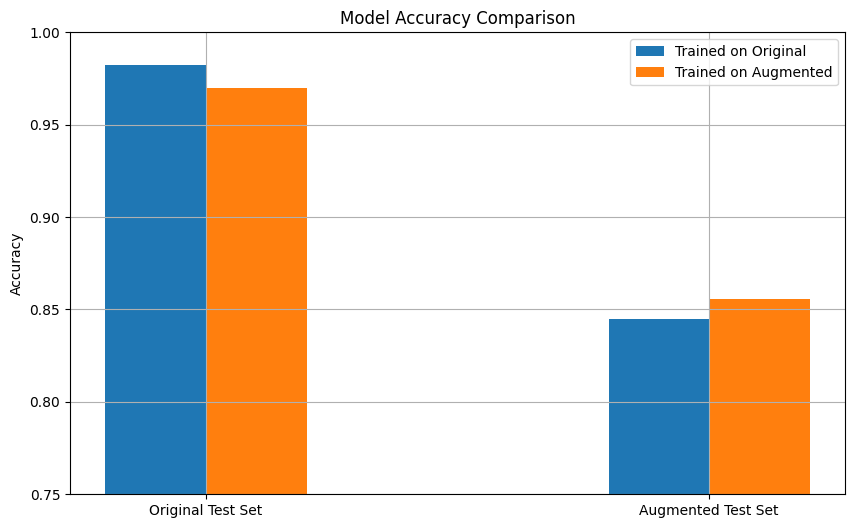

In [63]:
import matplotlib.pyplot as plt

# plot

# Plot comparison
labels = ['Original Test Set', 'Augmented Test Set']
acc_model_orig = [accuracy_original, accuracy_original_aug]
acc_model_aug = [accuracy_augmented, accuracy_augmented_aug]


x = np.arange(len(labels))
width = 0.20

plt.figure(figsize=(10,6))
plt.bar(x - width/2, acc_model_orig, width, label='Trained on Original')
plt.bar(x + width/2, acc_model_aug, width, label='Trained on Augmented')

plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, labels)
plt.ylim([0.75, 1.0])
plt.legend()
plt.grid(True)
plt.show()